<a href="https://colab.research.google.com/github/dietadestina/PA_EVCast/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [151]:
df = pd.read_csv('https://raw.githubusercontent.com/dietadestina/PA_EVCast/refs/heads/main/ev_cat.csv')
df

,Date,Value
0,2001-01-01,92
1,2002-01-01,298
2,2003-01-01,82
3,2004-01-01,60
4,2005-01-01,64
...,...,...
278,2019-12-01,17033
279,2020-12-01,15854
280,2021-12-01,53755
281,2022-12-01,105006


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    283 non-null    object
 1   Value   283 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


In [153]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    283 non-null    datetime64[ns]
 1   Value   283 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.5 KB


In [154]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df = df[df.index.year >= 2015]
df

,Value
Date,
2015-01-01,176
2015-02-01,183
2015-03-01,222
2015-04-01,171
2015-05-01,193
...,...
2024-04-01,113345
2024-05-01,123868
2024-06-01,109302


<Axes: xlabel='Date'>

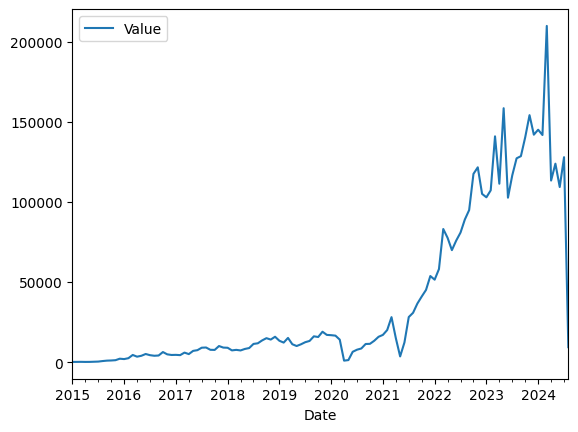

In [155]:
df.plot()

In [156]:
from statsmodels.tsa.stattools import adfuller


def adf_test(series):
    result = adfuller(series)
    print('Statistik ADF: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Data stasioner.")
    else:
        print("Data tidak stasioner.")

adf_test(df['Value'])

Statistik ADF: -2.4032910736671314
p- value: 0.1408096812490417
Data tidak stasioner.


In [157]:
df['Value1'] = df['Value'].diff()
df

<ipython-input-157-d43f2d99ae72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value1'] = df['Value'].diff()


,Value,Value1
Date,,
2015-01-01,176,NaN
2015-02-01,183,7.0
2015-03-01,222,39.0
2015-04-01,171,-51.0
2015-05-01,193,22.0
...,...,...
2024-04-01,113345,-96468.0
2024-05-01,123868,10523.0
2024-06-01,109302,-14566.0


In [158]:
df = df.dropna()
df

,Value,Value1
Date,,
2015-02-01,183,7.0
2015-03-01,222,39.0
2015-04-01,171,-51.0
2015-05-01,193,22.0
2015-06-01,288,95.0
...,...,...
2024-04-01,113345,-96468.0
2024-05-01,123868,10523.0
2024-06-01,109302,-14566.0


In [159]:
adf_test(df['Value1'])

Statistik ADF: -0.8172376274465345
p- value: 0.8140061330708465
Data tidak stasioner.


In [160]:
df['Value2'] = df['Value1'].diff()
df= df.dropna()
df

<ipython-input-160-0bae4b3d538f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value2'] = df['Value1'].diff()


,Value,Value1,Value2
Date,,,
2015-03-01,222,39.0,32.0
2015-04-01,171,-51.0,-90.0
2015-05-01,193,22.0,73.0
2015-06-01,288,95.0,73.0
2015-07-01,381,93.0,-2.0
...,...,...,...
2024-04-01,113345,-96468.0,-164541.0
2024-05-01,123868,10523.0,106991.0
2024-06-01,109302,-14566.0,-25089.0


In [161]:
adf_test(df['Value2'])

Statistik ADF: -2.6911802555451985
p- value: 0.07557694440114497
Data tidak stasioner.


In [162]:
df['Value3'] = df['Value2'].diff()
df= df.dropna()
df

<ipython-input-162-18cb928dfa41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value3'] = df['Value2'].diff()


,Value,Value1,Value2,Value3
Date,,,,
2015-04-01,171,-51.0,-90.0,-122.0
2015-05-01,193,22.0,73.0,163.0
2015-06-01,288,95.0,73.0,0.0
2015-07-01,381,93.0,-2.0,-75.0
2015-08-01,710,329.0,236.0,238.0
...,...,...,...,...
2024-04-01,113345,-96468.0,-164541.0,-235921.0
2024-05-01,123868,10523.0,106991.0,271532.0
2024-06-01,109302,-14566.0,-25089.0,-132080.0


In [163]:
adf_test(df['Value3'])

Statistik ADF: -5.499238279887488
p- value: 2.08939831205102e-06
Data stasioner.


In [164]:
df

,Value,Value1,Value2,Value3
Date,,,,
2015-04-01,171,-51.0,-90.0,-122.0
2015-05-01,193,22.0,73.0,163.0
2015-06-01,288,95.0,73.0,0.0
2015-07-01,381,93.0,-2.0,-75.0
2015-08-01,710,329.0,236.0,238.0
...,...,...,...,...
2024-04-01,113345,-96468.0,-164541.0,-235921.0
2024-05-01,123868,10523.0,106991.0,271532.0
2024-06-01,109302,-14566.0,-25089.0,-132080.0


#ARIMA#

In [165]:
pip install -q pmdarima

In [166]:
from pmdarima import auto_arima

model_arima = auto_arima(train_data['Value3'], seasonal=False, stepwise=True, trace=True)
print(model_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1670.936, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1659.621, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1631.724, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1616.741, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1614.937, Time=0.05 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1590.447, Time=0.07 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1577.299, Time=0.23 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1591.939, Time=0.25 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=1577.532, Time=0.28 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1583.030, Time=0.39 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1578.518, Time=1.06 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0]          
Total fit time: 2.771 seconds
                               S

In [168]:
pred = model_arima.predict(n_periods=len(test_data))
pred = pd.Series(pred, index=test_data.index)
test_data['pred'] = pred

pred_reverted = pred + test_data['Value2'].iloc[-len(pred):].values  # Menambahkan kembali Value2
pred_reverted = pred_reverted + test_data['Value1'].iloc[-len(pred):].values  # Menambahkan kembali Value1
pred_reverted = pred_reverted + test_data['Value'].iloc[0]  # Menambahkan nilai pertama Value
residuals = test_data['Value'] - pred_reverted

test_data['pred_reverted'] = pred_reverted

pred_reverted

<ipython-input-168-01c45ddc2aab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred'] = pred
<ipython-input-168-01c45ddc2aab>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred_reverted'] = pred_reverted


,0
Date,
2022-01-01,37018.838951
2022-02-01,58652.277275
2022-03-01,98809.458937
2022-04-01,18797.914873
2022-05-01,40178.863153
2022-06-01,70204.427155
2022-07-01,57010.618020
2022-08-01,60969.525795
2022-09-01,54677.816724


In [169]:
residuals

,0
Date,
2022-01-01,14470.161049
2022-02-01,-555.277275
2022-03-01,-15708.458937
2022-04-01,58815.085127
2022-05-01,29740.136847
2022-06-01,5676.572845
2022-07-01,23866.381980
2022-08-01,28041.474205
2022-09-01,40236.183276


<Axes: xlabel='Date'>

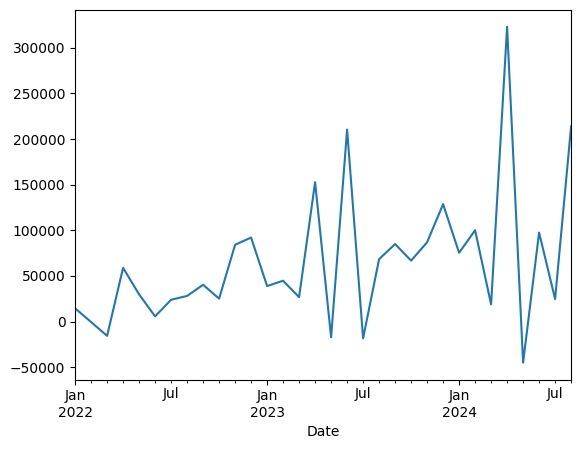

In [170]:
residuals.plot()

<Axes: xlabel='Date'>

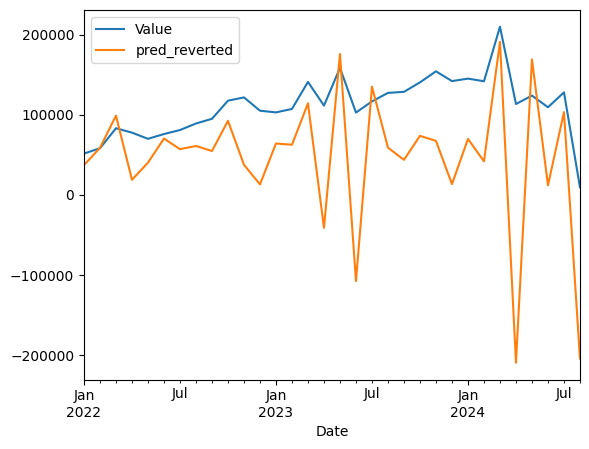

In [171]:
test_data[['Value','pred_reverted']].plot()

Hasil Forecast 5 Tahun ke Depan:
2022-01-01   -1277.161049
2022-02-01   -8318.722725
2022-03-01    3920.458937
2022-04-01    3288.914873
2022-05-01   -1410.136847
Freq: MS, dtype: float64
            Forecast
2024-08-31       NaN
2024-09-30       NaN
2024-10-31       NaN
2024-11-30       NaN
2024-12-31       NaN


<ipython-input-172-1f61c25f48cc>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=test_data.index[-1] + timedelta(days=1), periods=n_periods, freq='M')  # Tahun berikutnya


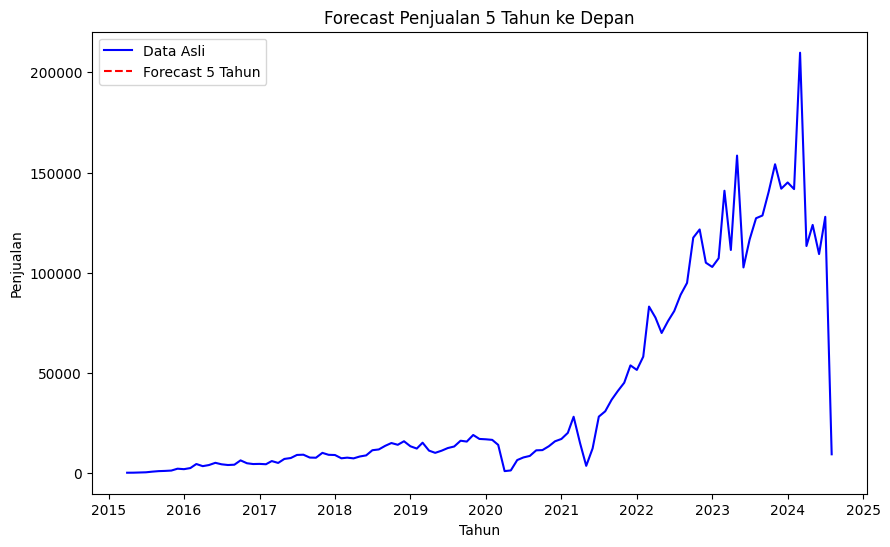

In [172]:
# Tentukan jumlah periode untuk forecasting (5 tahun)
n_periods = 5

# Prediksi menggunakan model ARIMA
forecast = model_arima.predict(n_periods=n_periods)

# Tampilkan hasil forecast
print("Hasil Forecast 5 Tahun ke Depan:")
print(forecast)

# Menampilkan prediksi dalam bentuk DataFrame
forecast_dates = pd.date_range(start=test_data.index[-1] + timedelta(days=1), periods=n_periods, freq='M')  # Tahun berikutnya
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])
print(forecast_df)

# Plot hasil prediksi dan data asli
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Value'], label='Data Asli', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast 5 Tahun', color='red', linestyle='--')
plt.title('Forecast Penjualan 5 Tahun ke Depan')
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.legend()
plt.show()